# Pre-eliminary data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def rational(P,tr,A,L,Lc,S,c,tcmod):
    '''rational method with parameter input: Rainfall, P in mm, rainfall duration, tr in hour, catchment area A, in Km2, cofficient runoff c, 
    length of mainstream L in Km, length to centroid Lc in Km, sinus Slope, tc model (tc mod) 1=kirpich, 2=chow, 
    3=watt and chow, 4=snyder '''
    I = P/tr
    Qp = c*I*A*1000000/3600/1000
    if tcmod==1:
        tc=0.0664*(L/S**0.5)**0.77 #TC Kirpich
        tcmodel="kirpich tc model"
    if tcmod==2:
        tc=0.161*(L/S**0.5)**0.64 #TC Chow
        tcmodel="Chow tc model"
    if tcmod==3:
        tc=0.128*(L/S**0.5)**0.79 # Watt and chow
        tcmodel="Watt Chow tc model"
    if tcmod==4:    
        tc=0.7*(L*Lc/S**0.5)**0.38 # snyder
        tcmodel="snyder tc model"
    t=[0,tc,tr,tr+tc]
    q=[0,Qp,Qp,0]
    return(t,q,tcmodel)

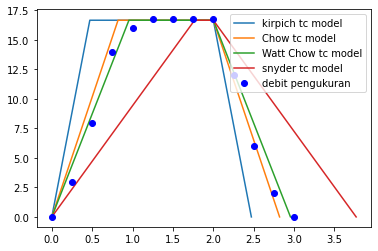

In [3]:
#arbitrary catchment
P=100
tr=2
A=2
L=1.8
Lc=0.9
S=0.02
c=0.6
#run
t1,q1,tcmodel1=rational(P,tr,A,L,Lc,S,c,tcmod=1)
t2,q2,tcmodel2=rational(P,tr,A,L,Lc,S,c,tcmod=2)
t3,q3,tcmodel3=rational(P,tr,A,L,Lc,S,c,tcmod=3)
t4,q4,tcmodel4=rational(P,tr,A,L,Lc,S,c,tcmod=4)
plt.plot(t1,q1,label=tcmodel1)
plt.plot(t2,q2,label=tcmodel2)
plt.plot(t3,q3,label=tcmodel3)
plt.plot(t4,q4,label=tcmodel4)
plt.legend(loc="best")
data=np.loadtxt("data_kuliah04.txt")
tdata=data[:,0]
qdata=data[:,1]
plt.plot(tdata,qdata,'bo', label="debit pengukuran")
plt.legend(loc="best")

# Tugas
Uji kinerja 4 model diatas dengan 5 parameter kinerja model. yaitu:
1. Error absolut
2. Error relatif
3. RMSE
4. Koefisien korelasi r (momen produk pearson)
5. Nash-Sutchliffe Index

## Rumus uji korelasi
![](rumus-korelasi.png)

## Step Pengerjaan:
1. Cari data interpolasi tiap model (q) agar mengikuti waktu dari data  observasi
2. export data interpolasi langkah pertama, dan coba di excel.
3. aplikasikan rumus excel di python dengan fungsi yang tersedia.
4. Buat data frame kesimpulan.
5. bandingkan langkah nomor 4 dengan nomor 2, jika sudah sesuai, tugas selesai. Jika belum sesuai ulangi dari langkah nomor 3.

In [4]:
# langkah 1. Cari data interpolasi pada tiap model
q1baru=np.interp(tdata,t1,q1) #q kirpich baru
q2baru=np.interp(tdata,t2,q2) #q chow baru
q3baru=np.interp(tdata,t3,q3) #q watt and chow baru
q4baru=np.interp(tdata,t4,q4) #q snyder baru

# langkah 2. export data interpolasi dan coba di excel
np.savetxt('q kirpich.txt',q1baru,fmt='%.3f')
np.savetxt('q chow.txt',q2baru,fmt='%.3f')
np.savetxt('q watt and chow.txt',q3baru,fmt='%.3f')
np.savetxt('q snyder.txt',q4baru,fmt='%.3f')

# langkah 3. Aplikasikan fungsi python yang equivalent dengan rumus excel.
# 1. Error Absolut
e_abs_kirpich = abs(max(q1baru)-max(qdata)) # tinjauan terhadap kirpich
e_abs_chow = abs(max(q2baru)-max(qdata)) # tinjauan terhadap chow
e_abs_watt_chow = abs(max(q3baru)-max(qdata)) # tinjauan terhadap watt and chow
e_abs_snyder = abs(max(q4baru)-max(qdata)) # tinjauan terhadap snyder

# 2. Error relatif
e_relatif_kirpich = abs(max(q1baru)-max(qdata))/abs(max(qdata)) # tinjauan terhadap kirpich
e_relatif_chow = abs(max(q2baru)-max(qdata))/abs(max(qdata)) # tinjauan terhadap kirpich
e_relatif_watt_chow = abs(max(q3baru)-max(qdata))/abs(max(qdata)) # tinjauan terhadap kirpich
e_relatif_snyder = abs(max(q4baru)-max(qdata))/abs(max(qdata)) # tinjauan terhadap kirpich

# 3. RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE_kirpich =  mean_squared_error(qdata,q1baru,squared=False) # tinjauan terhadap kirpich
RMSE_chow =  mean_squared_error(qdata,q2baru,squared=False) # tinjauan terhadap chow
RMSE_watt_chow =  mean_squared_error(qdata,q3baru,squared=False) # tinjauan terhadap watt_chow
RMSE_snyder =  mean_squared_error(qdata,q4baru,squared=False) # tinjauan terhadap snyder

# 4. Koefisien korelasi r (momen produk pearson)
import scipy.stats
r_kirpich = scipy.stats.pearsonr(qdata,q1baru)[0]
r_chow = scipy.stats.pearsonr(qdata,q2baru)[0]
r_watt_chow = scipy.stats.pearsonr(qdata,q3baru)[0]
r_snyder = scipy.stats.pearsonr(qdata,q4baru)[0]

# 5. Nash Sutchliffe Index
mean_obs = np.mean(qdata)

NS_kirpich = 1-((sum((qdata-q1baru)**2))/(sum((mean_obs-q1baru)**2)))
NS_chow = 1-((sum((qdata-q2baru)**2))/(sum((mean_obs-q2baru)**2)))
NS_watt_chow = 1-((sum((qdata-q3baru)**2))/(sum((mean_obs-q3baru)**2)))
NS_snyder = 1-((sum((qdata-q4baru)**2))/(sum((mean_obs-q4baru)**2)))

In [6]:
# langkah 4, buat data frame untuk kesimpulan
import pandas as pd
data = {'Metode Korelasi':['Error Absolute','Error Relatif','RMSE','R Pearson','Nash-Sutchliffe Index'],
       'Tc Kirpich':[e_abs_kirpich,e_relatif_kirpich,RMSE_kirpich,r_kirpich,NS_kirpich],
       'Tc Chow':[e_abs_chow,e_relatif_chow,RMSE_chow,r_chow,NS_chow],
       'Tc Watt and Chow':[e_abs_watt_chow,e_relatif_watt_chow,RMSE_watt_chow,r_watt_chow,NS_watt_chow],
       'Tc Snyder':[e_abs_snyder,e_relatif_snyder,RMSE_snyder,r_snyder,NS_snyder]}
df=pd.DataFrame(data)
df=df.set_index('Metode Korelasi')
print(df)

                       Tc Kirpich   Tc Chow  Tc Watt and Chow  Tc Snyder
Metode Korelasi                                                         
Error Absolute           0.083333  0.083333          0.083333   0.083333
Error Relatif            0.004975  0.004975          0.004975   0.004975
RMSE                     3.662943  0.951614          0.878293   4.681833
R Pearson                0.871783  0.991571          0.994095   0.710087
Nash-Sutchliffe Index    0.757252  0.979109          0.980615   0.140176


### Langkah 5, Bandingkan dengan data hasil perhitungan excel.
![](hasil-excel.jpg)

## Kesimpulan 
1. Hasil perhitungan antara program excel dan python sangat mirip/sama. 
2. Untuk metode error absolute dan error relatif, semua metode waktu konsentrasi menunjukkan hasil yang sama. Karena hanya satu nilai (Qpeak) yang dijadikan dasar perhitungan.
3. Berdasarkan dari hasil RMSE, metode Watt and Chow memiliki nilai yang sangat baik. Dimana dalam RMSE ini, nilai yang lebih kecil adalah nilai yang memiliki simpangan terkecil. *Lower is better*.
4. Untuk Metode R Pearson dan Nash-Sutchliffe Indeks, Watt and Chow juga metode yang paling baik. Dimana pada pengujian ini nilai yang paling mendekati 1 adalah nilai yang  dipilih (korelasi positif). 
